### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [43]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

import warnings
warnings.filterwarnings(action='ignore')


<Figure size 432x288 with 0 Axes>

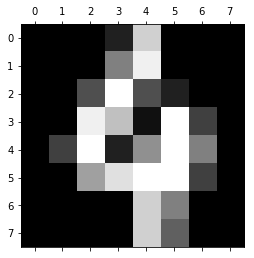

In [65]:
dataset = datasets.load_digits()

data =  pd.DataFrame(dataset['data'])
target = pd.DataFrame(dataset['target'])

plt.gray() 
plt.matshow(data.iloc[100].values.reshape(8,8)) 
plt.show() 


In [66]:
model = GradientBoostingClassifier(loss="deviance", 
                                   learning_rate=0.1,
                                   n_estimators=100 )


model.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

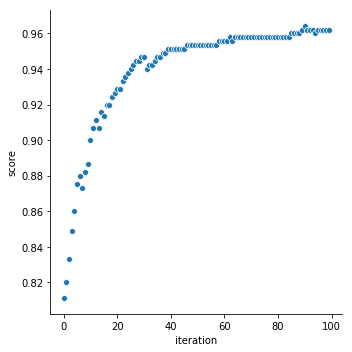

In [81]:
score= list()
for i, pred_y in enumerate(model.staged_predict(test_X)):
    score.append(accuracy_score(test_y, pred_y))
    
    
df = pd.Series(score).reset_index()
df.columns=['iteration','score']

sns.relplot(x="iteration", y="score", data=df)
plt.show()